# Data Analysis with Pandas DataFrames

### What we will cover
* Python Data Analysis Library
* Explore and plot data
* Common workflows for data analysis

We could spend a full week on data frames and analysis workflows alone, but today, we will focus on the foundation so you can explore more advanced options on your own.

Lesson plan comes from Data Carpentry:
* https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html
* https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html

### Setup
* Start from `~/Desktop/carpentries/` so that we're in the same place
* You can check this by running `%pwd` in a code cell

In [7]:
%pwd

'/home/charles/Desktop/carpentries'

Today, we're going to work with an ecology dataset for hands-on practice. A subset of Ernst et al Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA.

We are studying the species and weight of animals caught in different sites in our study area.

* Data link: https://drive.google.com/open?id=1UFs_lqcei76-EI3oaVM7o1mf-HW57eso

Each column has a feature, and each row is an observation. A few observations are missing features, and that is okay.

### Importing pandas
* Python Data Analysis Library (Pandas)
* Integrates with `matplotlib` and `numpy`

Some motivation for those who might use Excel already: Pandas is really flexible, which means it can be difficult to learn at first but ends up being really powerful with some practice.
* Really good at automating data-set cleanup and merging
* Quick ad-hoc analysis with missing data
* Integrated into other Python libraries (machine learning, instrumentation, etc)
* groupby analysis (similar to pivot tables)

In [1]:
import pandas as pd
# Now we use the syntax LibraryName.FunctionName, eg pd.read_csv

### Read in CSV data
* Can also use tab-separated, colon-separated, etc, different formats
* General idea is that we're working with *table* data

In [2]:
# variable naming:
# "surveys" for dataset name, "_df" for dataframe
surveys_df = pd.read_csv('data/surveys.csv')
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [3]:
# You may notice that pandas data-frames start at 0 indexing
# A slightly different view:
print(surveys_df)

       record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0              1      7   16  1977        2         NL    M             32.0   
1              2      7   16  1977        3         NL    M             33.0   
2              3      7   16  1977        2         DM    F             37.0   
3              4      7   16  1977        7         DM    M             36.0   
4              5      7   16  1977        3         DM    M             35.0   
...          ...    ...  ...   ...      ...        ...  ...              ...   
35544      35545     12   31  2002       15         AH  NaN              NaN   
35545      35546     12   31  2002       15         AH  NaN              NaN   
35546      35547     12   31  2002       10         RM    F             15.0   
35547      35548     12   31  2002        7         DO    M             36.0   
35548      35549     12   31  2002        5        NaN  NaN              NaN   

       weight  
0         NaN  
1      

In [4]:
surveys_df.head() # The head() method displays the first several lines of a file.

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [5]:
type(surveys_df) # <class 'pandas.core.frame.DataFrame'>

pandas.core.frame.DataFrame

You can find all attributes and methods of DataFrames at https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

In [6]:
# What kind of things does surveys_df contain?
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [7]:
# Access attributes with `df_object.attribute`
# For example:
print('surveys_df.dtypes:', surveys_df.dtypes)
print() # Blank line
print('surveys_df.columns:', surveys_df.columns)

surveys_df.dtypes: record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

surveys_df.columns: Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')


In [8]:
# Access methods with `df_object.method()`
# For example:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [9]:
# Challenge - DataFrames
# See what the following expressions return:
print(surveys_df.shape)
print() # Blank line
print(surveys_df.head(15))
print() # Blank line
print(surveys_df.tail())

(35549, 9)

    record_id  month  day  year  plot_id species_id  sex  hindfoot_length  \
0           1      7   16  1977        2         NL    M             32.0   
1           2      7   16  1977        3         NL    M             33.0   
2           3      7   16  1977        2         DM    F             37.0   
3           4      7   16  1977        7         DM    M             36.0   
4           5      7   16  1977        3         DM    M             35.0   
5           6      7   16  1977        1         PF    M             14.0   
6           7      7   16  1977        2         PE    F              NaN   
7           8      7   16  1977        1         DM    M             37.0   
8           9      7   16  1977        1         DM    F             34.0   
9          10      7   16  1977        6         PF    F             20.0   
10         11      7   16  1977        5         DS    F             53.0   
11         12      7   16  1977        7         DM    M        

In [10]:
# Grab a single column with df_object['column_name'], or
# df_object.column_name (if column name is a single word)
surveys_df.species_id
surveys_df['species_id'] # equivalent to above

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

^ We call a single-column a `Series`. Most operations you can do with a `DataFrame`, you can also do with a `Series`.

For all possible `Series` attributes and methods, see: https://pandas.pydata.org/pandas-docs/stable/reference/series.html

In [11]:
# let's grab the different species
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

### Exercise - exploring columns
* Create a list of unique site ID’s (`'plot_id'`) found in the surveys data. Call it `site_names`. How many unique sites are there in the data?

* Is there a difference between `len(site_names)` and `surveys_df['plot_id'].nunique()`?

In [12]:
# Solution to exercise
site_names = pd.unique(surveys_df['plot_id'])

print('Number of unique sites, calculated 2 ways:')
print('len(site_names) =', len(site_names))
print("surveys_df['plot_id'].nunique() =", surveys_df['plot_id'].nunique())

Number of unique sites, calculated 2 ways:
len(site_names) = 24
surveys_df['plot_id'].nunique() = 24


## Summary Statistics
We often want to calculate summary statistics to get intuition for a large dataset.

In [13]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [14]:
# Extract your standard metrics one at a time
surveys_df['weight'].min() # minimum of this column
surveys_df['weight'].max() # maximum of this column
surveys_df['weight'].mean() # average (mean) of this column
surveys_df['weight'].std() # standard deviation of this column
surveys_df['weight'].count() # number of non-missing values in this column

32283

In [15]:
# You can use describe over the entire DataFrame
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000


## Split-apply-combine
We often want to calculate summary statistics grouped by subsets or attributes within fields of our data. For example, we might want to group by species, sex, or observation site. We use the `.groupby` method to summarize by one or more variables.

In [16]:
# For example, let's group data by sex
grouped_data = surveys_df.groupby('sex')
grouped_data

This is a new datatype used to hold a list of related dataframes. For extended examples, see: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

For all possible attributes and methods, see: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [17]:
# Provide the mean for each numeric column by sex
grouped_data.mean()

,record_id,month,day,year,plot_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379


### Exercise - `groupby`

1. How many recorded individuals are female `F` and how many male `M`?
    * Remember that you can use `.mean()`, `.std()`, etc on `grouped_data`
2. Summarize weight values for each site (`'plot_id'`) in your data. You can use the following syntax to create summary statistics for a single column in your data:
    * `by_site = <fill in this side of the code>`
    * `by_site['weight'].describe()`

In [18]:
# Solution to exercise - groupby #1
grouped_data = surveys_df.groupby('sex')
grouped_data.count()['record_id'] # works as long as columns are all filled out
grouped_data.size() # also similar

sex
F    15690
M    17348
dtype: int64

In [19]:
# Solution to exercise - groupby #2
by_site = surveys_df.groupby('plot_id')
by_site['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
plot_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


Let's use a diagram to visualize what is going on with `groupby`. Image from https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99

### Split-Apply-Combine (`df.groupby`)
![Split-Apply-Combine](diagrams/split-apply-combine.png)

In [20]:
# One more example of split-apply-combine
# to solidfy this concept

# Count the number of samples by species, using unique record_id
by_species = surveys_df.groupby('species_id')
species_counts = by_species['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64


### Quick Plotting of species counts

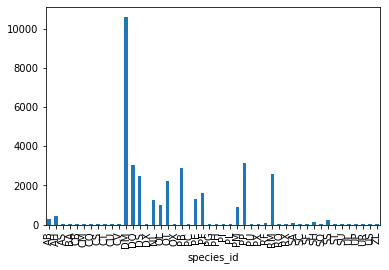

In [21]:
# Make sure figures appear inline in Ipython Notebook
%matplotlib inline
# Create a quick bar chart
species_counts = surveys_df.groupby('species_id')['record_id'].count()
species_counts.plot.bar()

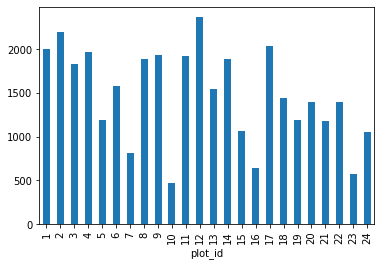

In [22]:
# No title / axis units, but we'll get to that
# in the upcoming lesson dedicated to plotting

# We can also look at how many animals were measured in each site:
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()
# Let's plot that too
total_count.plot.bar()

### Exercise - Plots
Create a plot of average weight across all species per site.

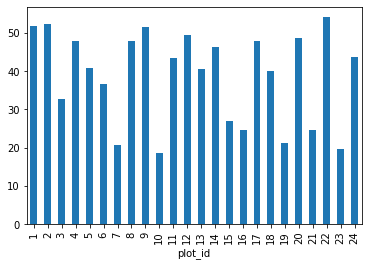

In [23]:
# Solution to exercise - plots
by_site = surveys_df.groupby('plot_id')
average_weight_by_site = by_site['weight'].mean()
average_weight_by_site.plot.bar()

## Summary of Lesson 2
* Pandas is a popular library for working with data.
* A Dataframe is a data structure for working with spreadsheet data.
* `df = pd.read_csv(filename)` reads data into the variable `df`. Then:
    * `df.head()` prints the first 5 rows
    * `df.describe()` provides summary statistics
    * You can also use `.sum()`, `.count()`, `.median()`, `.std()`, `.var()`, etc.
    * `df.groupby('column_name)` aggregates data into groups of the same value for analysis
    * `df.plot.bar()` creates a bar-plot
* split-apply-combine using `.groupby` allows you to analyze data across many different axes

Recommended workflow for data analysis
* Format raw data into rows of observations and columns
* Load data into Python
* Get basic intuition using `df.head()` and `df.describe()`
* Start analyzing across groups using `.groupby().describe()`
* Visualize groups using `.plot.bar()` or other plot tpes

# Lesson 3: Indexing, slicing, and subsetting DataFrames

Goal: let's filter out subsets of our data to analyze.

In [24]:
# If you skipped lesson 2,
# make sure pandas is loaded,
import pandas as pd

# and read in the survey CSV
surveys_df = pd.read_csv("data/surveys.csv")

### Indexing and Slicing
We often want to work with subsets of a DataFrame object. There are different ways to accomplish this including: using labels (column headings), numeric ranges, or specific `[row, column]` index locations.

### Filtering data
We can also select a subset of our data using criteria. For example, we can select all rows that have a year value of 2002:

In [25]:
surveys_df[surveys_df.year == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [26]:
# Or we can select all rows that do not contain the year 2002:
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [27]:
# We can define sets of criteria too:
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
...,...,...,...,...,...,...,...,...,...
11222,11223,12,8,1985,4,DM,M,36.0,40.0
11223,11224,12,8,1985,11,DM,M,37.0,49.0
11224,11225,12,8,1985,7,PE,M,20.0,18.0
11225,11226,12,8,1985,1,DM,M,38.0,47.0


In [28]:
# We can also remove all rows with missing data
surveys_dropna_df = surveys_df.dropna()
surveys_dropna_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


### Lesson 3 summary
* Data can be accessed with indices, slices, labels, or conditions
* Lots of ways to filter for the data you want to analyze. If you can specify your criteria, you can use the criteria to filter.

### Helpful resources
* [Pandas quick reference](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [10 minutes to pandas (tutorial)](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
* [Advanced Pandas examples](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)